### Importing libraries

In [644]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_selection import RFE
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Explore the data

In [470]:
df = pd.read_excel("/Users/praga/Downloads/AirQualityUCI/AirQualityUCI.xlsx")

In [471]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [472]:
df.shape

(9357, 15)

In [473]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

It has no null values. But the missing values are tagged with -200 value.

In [474]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [475]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [863]:
quality= df.copy().select_dtypes(['int','float'])
quality.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [864]:
quality=quality.replace(-200,np.nan)

In [865]:
quality.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Lets remove the rows which contain more than 5% missing values.

In [866]:
quality=quality.dropna(subset=["CO(GT)"],axis=0)
quality=quality.dropna(subset=["NO2(GT)"],axis=0)

In [867]:
quality.isnull().sum()

CO(GT)             0
PT08.S1(CO)      317
C6H6(GT)         317
PT08.S2(NMHC)    317
NOx(GT)            0
PT08.S3(NOx)     317
NO2(GT)            0
PT08.S4(NO2)     317
PT08.S5(O3)      317
T                317
RH               317
AH               317
dtype: int64

Let's fill the remaining values with mean of each columns.

In [868]:
quality=quality.fillna(quality.mean())
quality.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [869]:
quality.head(10)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,1.2,1197.00,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,1.2,1185.00,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,1.0,1136.25,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,0.9,1094.00,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
11,0.7,1066.00,1.133431,512.00,16.0,1918.00,28.0,1182.00,421.75,11.000,56.175000,0.736560


In [951]:
quality.shape
print " We are left with " ,7258/float(9357)*100,"% of the original data."

 We are left with  77.5675964519 % of the original data.


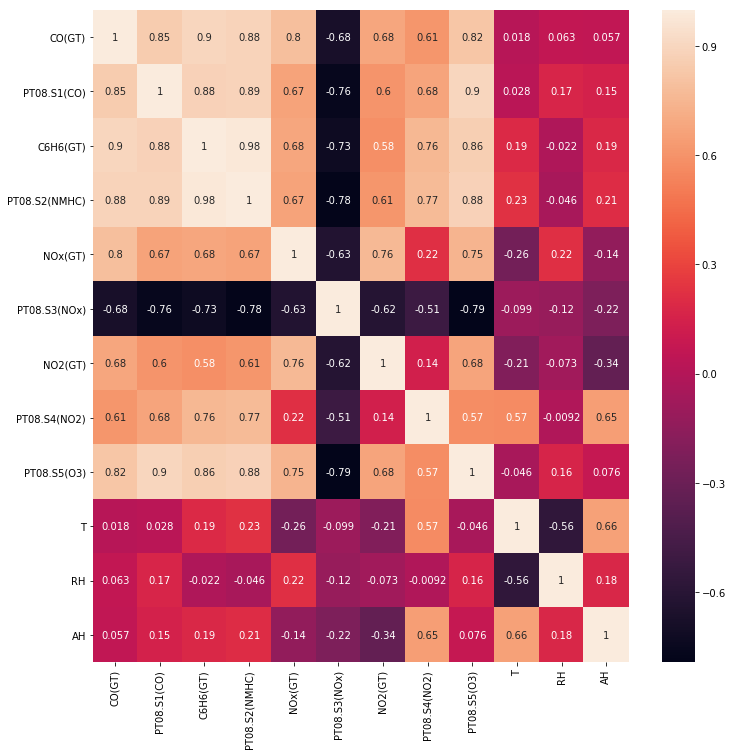

In [873]:
corrmat= quality.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(corrmat, annot=True,linecolor='blue')

### Data Description 

0 Date	(DD/MM/YYYY) 

1 Time	(HH.MM.SS) 

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer) 

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in °C	

13 Relative Humidity (%) 

14 AH Absolute Humidity 

### Regression

#### Feature preparation

We are selecting the optimum features using Recursive Feature Elimination.

In [894]:
quality=quality.select_dtypes(['int','float'])
x=quality.drop(['AH'],axis=1)
y=quality['AH']
def rfe(model,n_features):
    rfe = RFE(model ,n_features)
    rfe=rfe.fit(x,y)
    #print(rfe.ranking_)
    ranking=rfe.ranking_
    col=quality.columns.drop(["AH"])
    cols=[]

    i=0
    for rank in ranking:
        if rank == 1:
            cols.append(col[i])
            i+=1
        else:
            i+=1
    return cols

In [895]:
lr=LinearRegression()
new_features=[]
rmses=[]
for n in range(2,12,1):
    features= rfe(lr,n)
    new_features.append(features)
new_features

[[u'T', u'RH'],
 [u'CO(GT)', u'T', u'RH'],
 [u'CO(GT)', u'C6H6(GT)', u'T', u'RH'],
 [u'CO(GT)', u'C6H6(GT)', u'NO2(GT)', u'T', u'RH'],
 [u'CO(GT)', u'C6H6(GT)', u'PT08.S2(NMHC)', u'NO2(GT)', u'T', u'RH'],
 [u'CO(GT)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'T',
  u'RH'],
 [u'CO(GT)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'T',
  u'RH'],
 [u'CO(GT)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'T',
  u'RH'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'T',
  u'RH'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'PT08.S5(O3)',
  u'T',
  u'RH']]

In [896]:
for features in new_features:
    x=quality[features]
    y=quality['AH']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    rmse= mean_squared_error(y_pred,y_test)**(0.5)
    rmses.append(rmse)
rmses

[0.13270939388775316,
 0.13257581387249556,
 0.132458983476596,
 0.13063480944716788,
 0.1306281070419018,
 0.12627518284089997,
 0.12110772236144017,
 0.11997320741267327,
 0.11831934780431942,
 0.11796367588650161]

(1, 13)

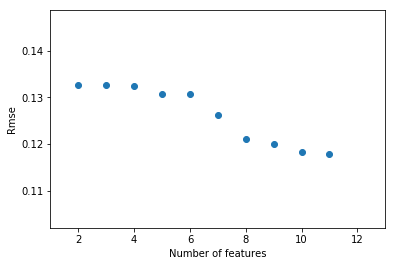

In [897]:
n=range(2,12)
plt.scatter(n,rmses)
plt.xlabel("Number of features")
plt.ylabel("Rmse")
plt.xlim(1,13)

In [899]:
print"Number of optimal features to be selected is:",(rmses.index(min(rmses))+2)
print"Least error possible in Linear Regression is:",min(rmses)
print"The optimal features are:",list(new_features[9])

Number of optimal features to be selected is: 11
Least error possible in Linear Regression is: 0.11796367588650161
The optimal features are: [u'CO(GT)', u'PT08.S1(CO)', u'C6H6(GT)', u'PT08.S2(NMHC)', u'NOx(GT)', u'PT08.S3(NOx)', u'NO2(GT)', u'PT08.S4(NO2)', u'PT08.S5(O3)', u'T', u'RH']


We will use these optimal features in the linear regression model.

In [919]:
x=quality[new_features[9]]
y=quality['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
lr.fit(X_train,y_train)
rmse_lr={}
for cv in range(2,25,2):
    y_pred=cross_val_predict(lr,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_lr[cv]=r
rmse_lr

{2: 0.11854767899938128,
 4: 0.11858351560092581,
 6: 0.118520732376657,
 8: 0.11846138612890114,
 10: 0.11836071572584778,
 12: 0.11839968234172227,
 14: 0.11831474033016387,
 16: 0.11857316399574389,
 18: 0.11844476276412844,
 20: 0.11841969682753464,
 22: 0.11837994217551909,
 24: 0.11834041950929675}

Text(0.5,0,u'Cross_val')

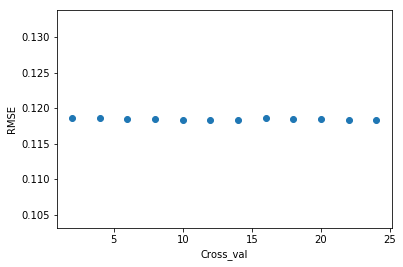

In [920]:
cv=range(2,25,2)
plt.scatter(cv,rmse_lr.values())
plt.ylabel("RMSE")
plt.xlabel("Cross_val")

In [921]:
min(rmse_lr.values())

0.11831474033016387

This is the lowest error possible using linear regression model.

Lets use a different model to reduce the error.

### Random Forest Regressor

In [922]:
rand= RandomForestRegressor()
new_features_rand=[]
rmses_rand=[]
for n in range(2,11,1):
    features= rfe(rand,n)
    new_features_rand.append(features)
new_features_rand

[[u'T', u'RH'],
 [u'PT08.S4(NO2)', u'T', u'RH'],
 [u'NO2(GT)', u'PT08.S4(NO2)', u'T', u'RH'],
 [u'PT08.S2(NMHC)', u'NO2(GT)', u'PT08.S4(NO2)', u'T', u'RH'],
 [u'NOx(GT)', u'PT08.S3(NOx)', u'NO2(GT)', u'PT08.S4(NO2)', u'T', u'RH'],
 [u'PT08.S1(CO)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'T',
  u'RH'],
 [u'PT08.S1(CO)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'T',
  u'RH'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'PT08.S2(NMHC)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'T',
  u'RH'],
 [u'CO(GT)',
  u'PT08.S1(CO)',
  u'C6H6(GT)',
  u'NOx(GT)',
  u'PT08.S3(NOx)',
  u'NO2(GT)',
  u'PT08.S4(NO2)',
  u'PT08.S5(O3)',
  u'T',
  u'RH']]

In [923]:
df=quality.copy()
for features in new_features_rand:
    x=df[features]
    y=df['AH']
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    rand.fit(X_train,y_train)
    y_pred=rand.predict(X_test)
    rmse = mean_squared_error(y_pred,y_test)**(0.5)
    rmses_rand.append(rmse)
rmses_rand

[0.014384514028690008,
 0.017783188859752056,
 0.01917763584888016,
 0.01947180847339204,
 0.022163765990726888,
 0.020231986244302468,
 0.020540156773699022,
 0.021537312406327506,
 0.021822643809290748]

In [924]:
min(rmses_rand)

0.014384514028690008

Text(0,0.5,u'Rmse')

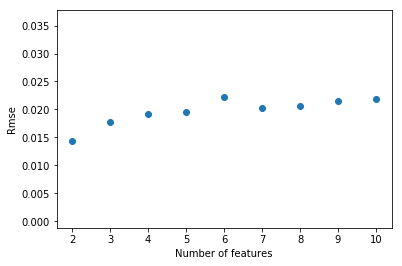

In [925]:
n=range(2,11,1)
plt.scatter(n,rmses_rand)
plt.xlabel("Number of features")
plt.ylabel("Rmse")

In [945]:
print"Least error possible in Random Forest Regression is:",min(rmses_rand)

Least error possible in Random Forest Regression is: 0.014384514028690008


#### Cross validation in Random forest

A model with 2 features.

In [927]:
x=df[new_features_rand[0]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand

{2: 0.035698510699362807,
 6: 0.027857824629500344,
 10: 0.02538230293295991,
 14: 0.025653021651998224,
 18: 0.02595563069026618,
 22: 0.023893145915433914,
 26: 0.023746119546442093,
 30: 0.024309059816843295,
 34: 0.024769563835503907,
 38: 0.024818947484272512,
 42: 0.023697029100916034,
 46: 0.023860571689493567}

Text(0,0.5,u'Rmse')

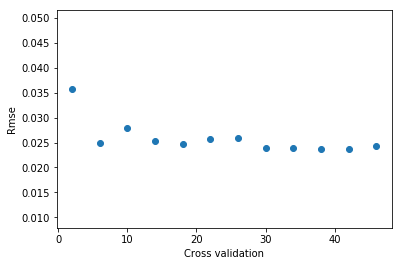

In [928]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [942]:
f_2=min(rmse_rand.values())
f_2

0.034394740919170406

Lets use a model which has 3 features

In [933]:
x=df[new_features_rand[1]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand

{2: 0.045469122345525775,
 6: 0.03331210776553217,
 10: 0.030528668289645563,
 14: 0.03100942963034666,
 18: 0.030561374228482024,
 22: 0.030459154257843266,
 26: 0.03001682217163691,
 30: 0.03059182140963211,
 34: 0.030690836590147392,
 38: 0.03001067919525436,
 42: 0.030979344671663984,
 46: 0.029586484783788204}

Text(0,0.5,u'Rmse')

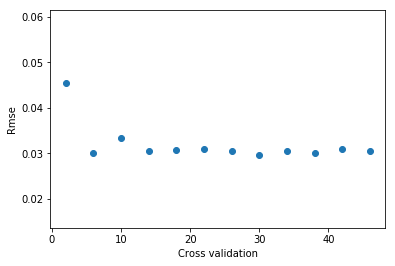

In [934]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [936]:
f_3=min(rmse_rand.values())
f_3

0.029586484783788204

Now, a model with 4 features.

In [939]:
x=df[new_features_rand[2]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand


{2: 0.048021212420590736,
 6: 0.03789975620964978,
 10: 0.0368464760895562,
 14: 0.035802838538709886,
 18: 0.03516274379125849,
 22: 0.03457532211558226,
 26: 0.036445955836908746,
 30: 0.034950781334870375,
 34: 0.03567106852096031,
 38: 0.03475874899181151,
 42: 0.035391341261418255,
 46: 0.034394740919170406}

Text(0,0.5,u'Rmse')

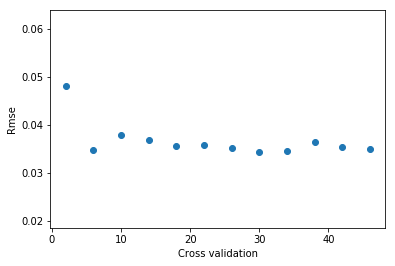

In [940]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [941]:
f_4=min(rmse_rand.values())
f_4

0.034394740919170406

A model with 5 features

In [930]:
x=df[new_features_rand[3]]
y=df['AH']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
rmse_rand={}
for cv in range(2,50,4):
    y_pred=cross_val_predict(rand,X_test,y_test,cv=cv)
    r=mean_squared_error(y_pred,y_test)**(0.5)
    rmse_rand[cv]=r
rmse_rand

{2: 0.048223119885171445,
 6: 0.03851089929880945,
 10: 0.035854476506988704,
 14: 0.03730356990776768,
 18: 0.03552636135669827,
 22: 0.0353826623833764,
 26: 0.03697165899719441,
 30: 0.036220122972557,
 34: 0.03594790784487026,
 38: 0.035367911893327,
 42: 0.037579896165913326,
 46: 0.03710534036218493}

Text(0,0.5,u'Rmse')

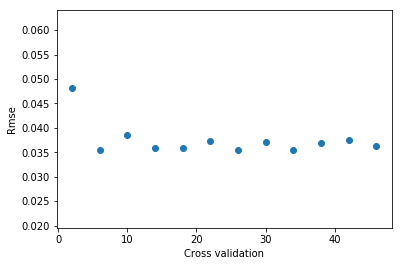

In [931]:
cv=range(2,50,4)
plt.scatter(cv,rmse_rand.values())
plt.xlabel("Cross validation")
plt.ylabel("Rmse")

In [932]:
f_5=min(rmse_rand.values())
f_5

0.035367911893327

Text(0,0.5,u'Number of Features')

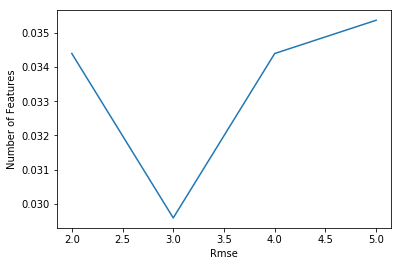

In [943]:
vals=[f_2,f_3,f_4,f_5]
ftrs=range(2,6)
plt.plot(ftrs,vals)
plt.xlabel("Rmse")
plt.ylabel("Number of Features")

In [944]:
f_3

0.029586484783788204

From the above models, we are getting least error when we use a model with 3 features and we are getting error of 0.02958.

In [946]:
quality['AH'].describe()

count    7258.000000
mean        0.985573
std         0.392239
min         0.184679
25%         0.708420
50%         0.977387
75%         1.228663
max         2.180639
Name: AH, dtype: float64

We see that the target variable "Absolute Humidity" varies from 0.18 to 2.18. So an error of 0.029 is really good to predict the Humidity value.